Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [ ]:
itcdf = yf.download('ITC.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
itcdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,215.333328,216.433334,212.066666,212.833328,173.298538,7798696
2015-12-17,213.133331,214.500000,210.866669,213.666672,173.977097,8683828
2015-12-18,213.933334,215.333328,210.933334,211.399994,172.131470,14226303
2015-12-21,213.333328,218.300003,211.366669,217.699997,177.261200,8042634
2015-12-22,216.699997,217.000000,213.000000,213.500000,173.841385,6092220


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
itcdf['Return_ITC'] = np.log(itcdf['Adj Close']/itcdf['Adj Close'].shift(1))
print(itcdf['Return_ITC']) 

Date
2015-12-16         NaN
2015-12-17    0.003908
2015-12-18   -0.010665
2015-12-21    0.029366
2015-12-22   -0.019481
                ...   
2016-12-28    0.005964
2016-12-29    0.002333
2016-12-30    0.023659
2017-01-02   -0.002901
2017-01-03    0.009911
Name: Return_ITC, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
itcdf.dropna(inplace=True)

In [ ]:
itcdf

,Open,High,Low,Close,Adj Close,Volume,Return_ITC
Date,,,,,,,
2015-12-17,213.133331,214.500000,210.866669,213.666672,173.977097,8683828,0.003908
2015-12-18,213.933334,215.333328,210.933334,211.399994,172.131470,14226303,-0.010665
2015-12-21,213.333328,218.300003,211.366669,217.699997,177.261200,8042634,0.029366
2015-12-22,216.699997,217.000000,213.000000,213.500000,173.841385,6092220,-0.019481
2015-12-23,214.666672,216.000000,213.333328,214.333328,174.519913,5272521,0.003896
...,...,...,...,...,...,...,...
2016-12-28,232.699997,236.399994,232.699997,235.449997,192.787186,14166131,0.005964
2016-12-29,235.300003,237.000000,232.300003,236.000000,193.237534,14052730,0.002333
2016-12-30,237.449997,242.399994,236.300003,241.649994,197.863770,10420088,0.023659


In [ ]:
itcreturns = itcdf['Return_ITC']
itcreturns.head()


Date
2015-12-17    0.003908
2015-12-18   -0.010665
2015-12-21    0.029366
2015-12-22   -0.019481
2015-12-23    0.003896
Name: Return_ITC, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,itcreturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_ITC
Date,,
2015-12-17,0.011985,0.003908
2015-12-18,-0.010560,-0.010665
2015-12-21,0.009297,0.029366
2015-12-22,-0.006191,-0.019481
2015-12-23,0.010203,0.003896


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_ITC    256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
nifty_df

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900,0.011985
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400,-0.010560
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300,0.009297
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700,-0.006191
2015-12-23,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900,0.010203
...,...,...,...,...,...,...,...
2016-12-28,8047.549805,8100.549805,8028.399902,8034.850098,8034.850098,126700,0.000249
2016-12-29,8030.600098,8111.100098,8020.799805,8103.600098,8103.600098,178500,0.008520
2016-12-30,8119.649902,8197.000000,8114.750000,8185.799805,8185.799805,127600,0.010093


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_ITC']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_ITC   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.94e-25
Time:                        18:11:57   Log-Likelihood:                 748.02
No. Observations:                 256   AIC:                            -1492.
Df Residuals:                     254   BIC:                            -1485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.001      0.362      0.718      -0.001       0.002
Return_NIFTY     0.9953      0.086     11.511      0.000       0.825       1.166
==============================================================================
Omnibus:                       38.829   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.895
Skew:                           0.705   Prob(JB):                     4.08e-21
Kurtosis:                       5.610   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betaitcmm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

5.944948515785899e-25

In [ ]:
returnsitc=returns

In [ ]:
returnsitc['ER_MM']=returnsitc['Return_NIFTY']*betaitcmm

In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM
Date,,,
2015-12-17,0.011985,0.003908,0.011928
2015-12-18,-0.010560,-0.010665,-0.010510
2015-12-21,0.009297,0.029366,0.009253
2015-12-22,-0.006191,-0.019481,-0.006162
2015-12-23,0.010203,0.003896,0.010155
...,...,...,...
2016-12-28,0.000249,0.005964,0.000248
2016-12-29,0.008520,0.002333,0.008480
2016-12-30,0.010093,0.023659,0.010045


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnsitc['Rm-Rf']=returnsitc['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_ITC']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_ITC   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.94e-25
Time:                        18:35:15   Log-Likelihood:                 748.02
No. Observations:                 256   AIC:                            -1492.
Df Residuals:                     254   BIC:                            -1485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.605      0.546      -0.001       0.002
Rm-Rf          0.9953      0.086     11.511      0.000       0.825       1.166
==============================================================================
Omnibus:                       38.829   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.895
Skew:                           0.705   Prob(JB):                     4.08e-21
Kurtosis:                       5.610   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsitc['ER_CAPM']=rfr+resultscapm.params[1]*returnsitc['Rm-Rf']

In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156
...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\Abhimanyu\\Downloads\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf

,Date,SMB,HML,WML,MF,RF,days to event
0,2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
1,2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2,2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
3,2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
4,2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...,...
256,2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
257,2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
258,2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38
259,2017-01-03,1.091910,0.168891,0.457422,0.466742,0.024439,39


In [ ]:
famadf.drop(260,inplace=True)

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-28,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156
...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046


In [ ]:
returnsitc.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=260, freq=None)

In [ ]:
returnsitc=returnsitc.join(famadf)

In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnsitc[['Rm-Rf','SMB','HML']]
y=returnsitc['Return_ITC']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_ITC   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     49.39
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.83e-25
Time:                        19:14:28   Log-Likelihood:                 753.49
No. Observations:                 256   AIC:                            -1499.
Df Residuals:                     252   BIC:                            -1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.818      0.414      -0.001       0.002
Rm-Rf          1.1399      0.096     11.847      0.000       0.950       1.329
SMB            0.0008      0.001      0.717      0.474      -0.001       0.003
HML           -0.0028      0.001     -3.225      0.001      -0.005      -0.001
==============================================================================
Omnibus:                       29.634   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.890
Skew:                           0.567   Prob(JB):                     8.12e-15
Kurtosis:                       5.190   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

-0.0028123211562113793

In [ ]:
returnsitc['ER_ff3']=rfr+resultsff3.params[1]*returnsitc['Rm-Rf']+resultsff3.params[3]*returnsitc['HML']

FAMA FRENCH 4

In [ ]:
X=returnsitc[['Rm-Rf','SMB','HML','MF']]
y=returnsitc['Return_ITC']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_ITC   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     37.67
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.14e-24
Time:                        19:19:53   Log-Likelihood:                 754.47
No. Observations:                 256   AIC:                            -1499.
Df Residuals:                     251   BIC:                            -1481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.859      0.391      -0.001       0.002
Rm-Rf          1.5305      0.297      5.158      0.000       0.946       2.115
SMB            0.0017      0.001      1.320      0.188      -0.001       0.004
HML           -0.0021      0.001     -2.076      0.039      -0.004      -0.000
MF            -0.0046      0.003     -1.391      0.165      -0.011       0.002
==============================================================================
Omnibus:                       31.162   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.723
Skew:                           0.569   Prob(JB):                     9.80e-17
Kurtosis:                       5.370   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see the p values for Rm-Rf and HML are less than 0.05 suggesting their significance whereas that of MF and SMB are more than 0.05 so they are not significant

In [ ]:
returnsitc['ER_ff4']=rfr+resultsff4.params[1]*returnsitc['Rm-Rf']+resultsff4.params[3]*returnsitc['HML']

In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.010183,0.015662
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012272,-0.016423
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.008163,0.012327
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008459,-0.010606
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.010034,0.014339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001666,0.001327
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.008624,0.012143
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011099,0.015059


In [ ]:
returnsitc['AR_MM']=returnsitc['Return_ITC']-returnsitc['ER_MM']

In [ ]:
returnsitc['AR_CAPM']=returnsitc['Return_ITC']-returnsitc['ER_CAPM']

In [ ]:
returnsitc['AR_ff3']=returnsitc['Return_ITC']-returnsitc['ER_ff3']

In [ ]:
returnsitc['AR_ff4']=returnsitc['Return_ITC']-returnsitc['ER_ff4']

In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.010183,0.015662,-0.008020,-0.008021,-0.006275,-0.011755
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012272,-0.016423,-0.000155,-0.000156,0.001607,0.005757
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.008163,0.012327,0.020112,0.020111,0.021203,0.017039
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008459,-0.010606,-0.013320,-0.013320,-0.011023,-0.008875
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.010034,0.014339,-0.006260,-0.006261,-0.006138,-0.010444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001666,0.001327,0.005716,0.005715,0.004298,0.004637
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.008624,0.012143,-0.006147,-0.006148,-0.006290,-0.009810
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011099,0.015059,0.013614,0.013613,0.012559,0.008600


In [ ]:
returnsitc_eventwindowbeyond=returnsitc[returnsitc['days to event']>=-20]

In [ ]:
returnsitc_eventwindowbeyond

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,0.006508,-0.001367,-0.001573,-1.365630e-03,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,-0.003611,-0.003713,0.007874,0.007873,0.010119,0.010221
2016-10-10,0.001287,0.004801,0.001281,0.001087,1.281798e-03,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,-0.000568,0.000366,0.003520,0.003519,0.005369,0.004435
2016-10-13,-0.015675,-0.004801,-0.015602,-0.015875,-1.560088e-02,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.016026,-0.022702,0.010801,0.010800,0.011225,0.017901
2016-10-14,0.001172,0.003968,0.001166,0.000972,1.167076e-03,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.000990,0.001450,0.002802,0.002801,0.002978,0.002518
2016-10-17,-0.007367,0.002914,-0.007332,-0.007567,-7.331261e-03,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.008378,-0.011346,0.010246,0.010245,0.011292,0.014260
2016-10-18,0.018316,0.021992,0.018230,0.018116,1.823115e-02,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.019721,0.027084,0.003762,0.003761,0.002271,-0.005092
2016-10-19,-0.002169,-0.026784,-0.002159,-0.002369,-2.157732e-03,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,-0.004389,-0.004835,-0.024625,-0.024626,-0.022394,-0.021949
2016-10-20,0.004643,-0.000418,0.004622,0.004443,4.622478e-03,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.001078,0.003877,-0.005039,-0.005040,-0.001496,-0.004294
2016-10-21,-0.000730,0.003337,-0.000727,-0.000930,-7.258980e-04,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,0.000175,-0.000451,0.004064,0.004063,0.003162,0.003788


In [ ]:
returnsitc_eventwindowbeyond['CAR_MM']=returnsitc_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnsitc_eventwindowbeyond['CAR_CAPM']=returnsitc_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnsitc_eventwindowbeyond['CAR_ff3']=returnsitc_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnsitc_eventwindowbeyond['CAR_ff4']=returnsitc_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnsitc_eventwindowbeyond

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,0.006508,-0.001367,-0.001573,-1.365630e-03,0.228604,0.717509,0.078106,-0.143927,0.024852,...,-0.003611,-0.003713,0.007874,0.007873,0.010119,0.010221,0.007874,0.007873,0.010119,0.010221
2016-10-10,0.001287,0.004801,0.001281,0.001087,1.281798e-03,0.213081,0.713678,-0.218750,0.292234,0.024852,...,-0.000568,0.000366,0.003520,0.003519,0.005369,0.004435,0.011395,0.011393,0.015488,0.014656
2016-10-13,-0.015675,-0.004801,-0.015602,-0.015875,-1.560088e-02,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.016026,-0.022702,0.010801,0.010800,0.011225,0.017901,0.022195,0.022193,0.026713,0.032557
2016-10-14,0.001172,0.003968,0.001166,0.000972,1.167076e-03,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.000990,0.001450,0.002802,0.002801,0.002978,0.002518,0.024997,0.024993,0.029691,0.035075
2016-10-17,-0.007367,0.002914,-0.007332,-0.007567,-7.331261e-03,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.008378,-0.011346,0.010246,0.010245,0.011292,0.014260,0.035243,0.035238,0.040983,0.049334
2016-10-18,0.018316,0.021992,0.018230,0.018116,1.823115e-02,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.019721,0.027084,0.003762,0.003761,0.002271,-0.005092,0.039005,0.039000,0.043255,0.044242
2016-10-19,-0.002169,-0.026784,-0.002159,-0.002369,-2.157732e-03,0.494551,0.671722,-0.331019,0.238067,0.024653,...,-0.004389,-0.004835,-0.024625,-0.024626,-0.022394,-0.021949,0.014380,0.014374,0.020860,0.022294
2016-10-20,0.004643,-0.000418,0.004622,0.004443,4.622478e-03,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.001078,0.003877,-0.005039,-0.005040,-0.001496,-0.004294,0.009341,0.009334,0.019365,0.017999
2016-10-21,-0.000730,0.003337,-0.000727,-0.000930,-7.258980e-04,0.652782,-0.368136,0.081786,0.098028,0.024809,...,0.000175,-0.000451,0.004064,0.004063,0.003162,0.003788,0.013405,0.013396,0.022526,0.021787


In [ ]:
returnsitc

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.010183,0.015662,-0.008020,-0.008021,-0.006275,-0.011755
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012272,-0.016423,-0.000155,-0.000156,0.001607,0.005757
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.008163,0.012327,0.020112,0.020111,0.021203,0.017039
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008459,-0.010606,-0.013320,-0.013320,-0.011023,-0.008875
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.010034,0.014339,-0.006260,-0.006261,-0.006138,-0.010444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001666,0.001327,0.005716,0.005715,0.004298,0.004637
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.008624,0.012143,-0.006147,-0.006148,-0.006290,-0.009810
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011099,0.015059,0.013614,0.013613,0.012559,0.008600


In [ ]:
returnsitc_eventwindowbeyond[['Return_ITC','CAR_MM']]

,Return_ITC,CAR_MM
Date,,
2016-10-07,0.006508,0.007874
2016-10-10,0.004801,0.011395
2016-10-13,-0.004801,0.022195
2016-10-14,0.003968,0.024997
2016-10-17,0.002914,0.035243
2016-10-18,0.021992,0.039005
2016-10-19,-0.026784,0.014380
2016-10-20,-0.000418,0.009341
2016-10-21,0.003337,0.013405


In [ ]:
returnsitcfinal=returnsitc.join(returnsitc_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnsitcfinal.columns

Index(['Return_NIFTY', 'Return_ITC', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB', 'HML',
       'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsitcfinal

,Return_NIFTY,Return_ITC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.003908,0.011928,0.011785,0.011929,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.010183,0.015662,-0.008020,-0.008021,-0.006275,-0.011755,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.010665,-0.010510,-0.010760,-0.010509,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.012272,-0.016423,-0.000155,-0.000156,0.001607,0.005757,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.029366,0.009253,0.009097,0.009254,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.008163,0.012327,0.020112,0.020111,0.021203,0.017039,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.019481,-0.006162,-0.006391,-0.006161,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.008459,-0.010606,-0.013320,-0.013320,-0.011023,-0.008875,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.003896,0.010155,0.010003,0.010156,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.010034,0.014339,-0.006260,-0.006261,-0.006138,-0.010444,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005964,0.000248,0.000049,0.000249,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,0.001666,0.001327,0.005716,0.005715,0.004298,0.004637,0.072005,0.071953,0.099010,0.131296
2016-12-29,0.008520,0.002333,0.008480,0.008320,0.008481,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.008624,0.012143,-0.006147,-0.006148,-0.006290,-0.009810,0.065858,0.065806,0.092720,0.121486
2016-12-30,0.010093,0.023659,0.010045,0.009893,0.010046,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.011099,0.015059,0.013614,0.013613,0.012559,0.008600,0.079472,0.079418,0.105279,0.130086


Description of various factors used in above APM

- Market Model : For the market index model, we use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.


- CAPM : In the CAPM model, we use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.


- FF3 : For Fama 3 factor model, we defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group), G, comprised the bottom 30% stocks in terms of the B/M ratio.
The remaining stocks were grouped as neutral (N) stocks, the value factor HML (High minus Low) is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies), the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies) High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. the third factor being the market risk premium to compute beta via regression.


- FF4 : For Fama 4 factor model, we used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

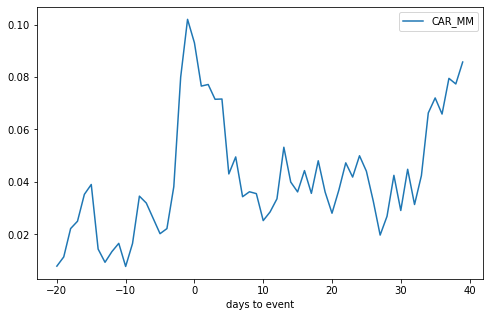

In [ ]:
returnsitcfinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

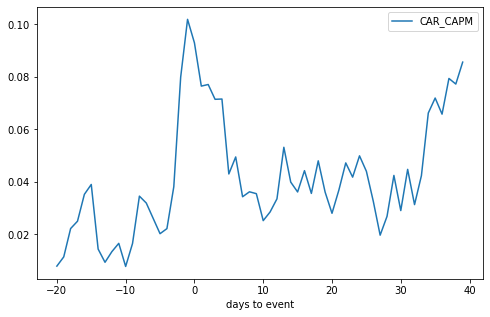

In [ ]:
returnsitcfinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

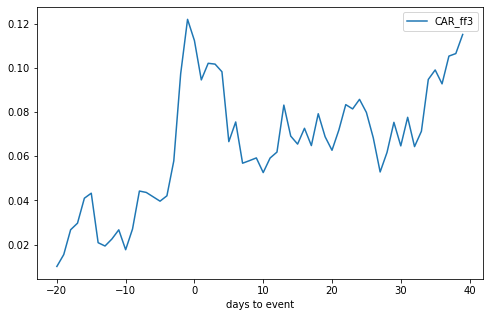

In [ ]:
returnsitcfinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

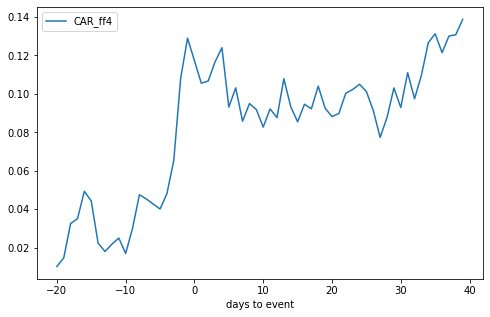

In [ ]:
returnsitcfinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

- Market Model:-The figure suggests that the capital market perceives this event to be unfavorable for this particular security

- CAPM:-The figure suggests that the capital market perceives this event to be unfavorable for this particular security


- FF3:-The figure suggests that the capital market perceives this event to be unfavorable for this particular security

- FF4:- The figure suggests that the capital market perceives this event to be unfavorable for this particular security but later shows strong recovery and 